In [1]:
# O'Reilly Bayes 
# Chapter  - Estimating Counts

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

In [3]:
def odds(p):
    return p / (1-p)

In [4]:
odds(0.75)

3.0

In [5]:
# Given the odds in favor, in decimal form, you can convert to probability like this:
def prob(o):
    return o / (o+1)

In [6]:
# If the odds are 3/2, the corresponding probability is 3/5:
prob(3/2)

0.6

In [7]:
# Bayes Rule
# So far we have worked with Bayes's theorem in the "probability form":

# P(H|D) = (P(H)P(D|H)) 
#             (P(D))

# Writing odds(A) for odds in favor of A, we can express Bayes's theorem in "odds form"
# odds (A|D) = odds(A) P(D|A)
#                      P(D|B)
    
# This is Bayes's rule, which says that the posterior odds are the prior odds times the likelihood ratio.  Bayes's rule is
# convenient for computing a Bayesian update on paper or in your head.  Let's go back to the cookie problem:

# Suppose there are two bowls of cookies.  Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies.  Bowl 2 contaings 20 of 
# each.  Now suppose you choose one of the bowls at random and, without looking, select a cookie at random.  The cookie is 
# vanilla. What is the probability that it came from Bowl 1?

# The prior probability is 50%, so the prior odds are 1. The likelihood ratio is 3/4, 1/2, or 3/2.  So the posterior odds are 
# 3/2,which corresponds to probability 3/5.

prior_odds = 1
likelihood_ratio = (3/4)/(1/2)
post_odds = prior_odds * likelihood_ratio
post_odds

# my least favorite peopel are people who say "this doesn't follow the normal process" so we will just ignore it and treat it
# unsolvable.  I need the minds that want to solve the problems that no one has ever solved before. Not those obsessed with 
# winning, but those obsessed with solving and pushing frontiers.

1.5

In [8]:
post_prob = prob(post_odds)
post_prob

0.6

In [9]:
#If we draw another cookie and the cookie is chocolate, we can do another update:
likelihood_ratio = (1/4) / (1/2)
post_odds *= likelihood_ratio
post_odds

0.75

In [10]:
# and convert back to probability
post_prob = prob(post_odds)
post_prob

0.42857142857142855

In [11]:
# Oliver's Blood
# I'll use Bayes' rule to solve another problem from MacKay's Information Theory, Inference, and Learning Algorithms
# 
# Two people have left traces of their own blood at the scene of a crime.  A suspect, Oliver, is 
# tested and found to have type 'O' blood. The blood groups of the two traces are found to have type 'O', 
# (frequency 60% for pop) and of type 'AB' (a rare type with frequency 1%).  Do these data [ the traces found at the scene]
# give evidence in favor of the proposition that Oliver was one of the people [who left blood at the scene]?

# To answer this question, we need to think about what it means for data to give evidence in favor (or against) a hypothesis.
# Intuitively, we might say that data favor a hypothesis if the hypothesis is more likely in light of the data than it was before.
# 
# In the Cookie Problem, the prior odds are 1, which corresponds to probability 50%.  The posterior odds are 3/2, or probability
# 60%.  So the vanilla cookie is evidence in favor of Bowl 1.
# Using Bayes Rule, we get Bayes factor

# odds(A|D)/odds(A) = P(D|A) / P(D|B)
# The term on the left is the ratio of posterior and prior odds.  The term on the right is the likelihood ratio, also called
# the Bayes factor.

# If the Bayes foctor is greater than 1, that means that the data were less likely under A than under B. And that means the odds
# are greater, in light of the data, than they were before.

# If the Bayes factor is less than 1, that means that the data were less likely under A than under B, so the odds in favor of
# A go down.

# If 1, equally likely

# Oliver's problem
# If Oliver is one of the people who left blood at the scene, he accounts for the 'O' sample; in that case, the probability of
# the data is the probability that a random member of the population has type 'AB' blood, which is 1%.

# If Oliver did not leave blood at the scene, we have two samples to account for.  If we choose two random people from the
# population, what is the chance of finding one with type 'O' and one with type 'AB'? Well, there are two ways it might happen:

# The first person might have 'O' and the second 'AB'
# or the first has 'AB' and the second 'O'

# The probability of either combination is (0.6)(0.01) which is 0.6%, so the total probability is twice that, or 1.2%.  So the
# data are a little more likely if Oliver is not one of the people who left blood at the scene.

# We can use these probabilities to computer the likelihood ratio

like1 = 0.01
like2 = 2 * 0.6 * 0.01

likelihood_ratio = like1 / like2
likelihood_ratio

0.8333333333333334

In [12]:
# Since the likelihood ratio is less than 1, the blood tests are evidence against the hypothesis that Oliver left blood at
# the scene.  But it is weak evidence.  For example, if the prior odds were 1 (a 50% probability), the posterior odds would be 
# 0.83, which corresponds to a probability of 45%:

post_odds = 1 * like1 / like2
prob(post_odds)

0.45454545454545453

In [13]:
# So the evidence doesn't "move the needle" very much.

# This example is a little contrived, but it demonstrates the counterintuitive result that data consistent with a hypothesis
# are not necessarily in favor of a hypothesis.

# If this result still bothers you, this way of thinking might help: the data consist of a common event, type 'O' blood, and a 
# rare event type 'AB' blood.  If Oliver accounts for the common event, that leaves the rare event unexplained.  If the Oliver 
# doesn't acount for the 'O' blood, we have two chances to find someone in the population with 'AB' blood.  
# And that factor of two makes a difference.

In [14]:
#Addends
# The second half of the chapter is about distributions of sums and results of other operations.  We'll start with a forward 
# problem, where we are given the inputs and compute the distribution of the output.  Then we will work on the inverse problems
# where we are given the outputs and we compute the distribution of the inputs.

# As a first example, suppose you roll two dice and add them up.  What is the distribution of the sum?  I'll use the following 
# function to create a Pmf that represents the possible outcomes of a die:

import numpy as np
from empiricaldist import Pmf

def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

die = make_die(6)

In [15]:
die.info

<bound method Series.info of 1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.166667
6    0.166667
Name: , dtype: float64>

In [16]:
ser = pd.Series(die, name = 'PMF')
pmf_df = ser.to_frame()
pmf_df

,PMF
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


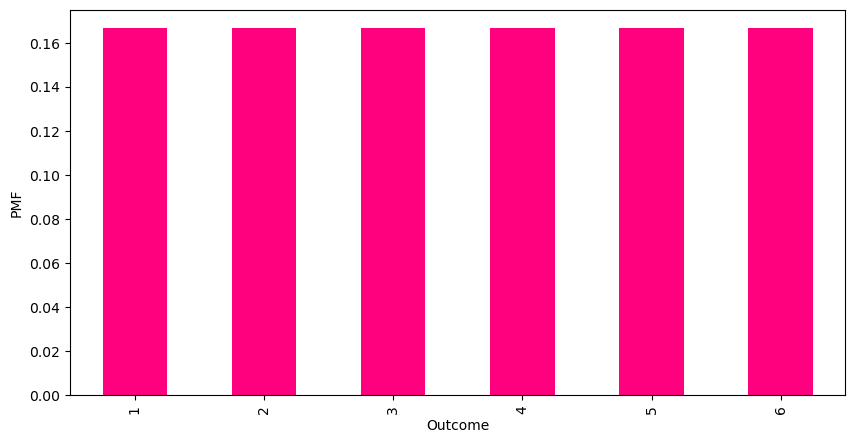

In [17]:
fig = plt.figure(figsize = (10, 5))
pmf_df['PMF'].plot(kind='bar', color = '#FF007F')
plt.xlabel("Outcome")
plt.ylabel("PMF")
plt.show()

In [18]:
# If we roll two dice and add them up, there are 11 possible outcomes, 2 through 12, but they are not equally 
# likely.  To computer the distribution of the sum, we have to enumerate the possible outcomes.

In [19]:
# And that is how the this function works:

def add_dist(pmf1, pmf2):
    """ Compute the distribution of a sum."""
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 * p2
            res[q] = res(q0) + p
        return res

In [20]:
# The parameters are Pmf objects representing distributions.
# The loops iterate through the quanitities and probabilities in the Pmf objects.  
# Each time through the loop q gets the sum of a pair of quantities , and p gets the probability of the pair.
# Because the same sum might appear more than once, we have to add up the total probability for each sum.

# Notice a subtle element of this line
# res[q] = res(q) + p
# I use parantheses on the right side of the assignment, which returns 0 if q does not appear yet in res.  
# I use brackets on the left side of the assignment to create or update an element in res; using parentheses on the
# left side would not work.

# Pmf provides add_dist, which does the same thing.  You can call it as a method like this:
# twice = die.add_dist(die)

#or as a function like this:
    
twice = Pmf.add_dist(die, die)   

In [21]:
twice.info()

<class 'empiricaldist.empiricaldist.Pmf'>
Int64Index: 11 entries, 2 to 12
Series name: 
Non-Null Count  Dtype  
--------------  -----  
11 non-null     float64
dtypes: float64(1)
memory usage: 176.0 bytes


In [22]:
twice_ser = pd.Series(twice, name = 'PMF')
twice_df = twice_ser.to_frame()
twice_df

,PMF
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


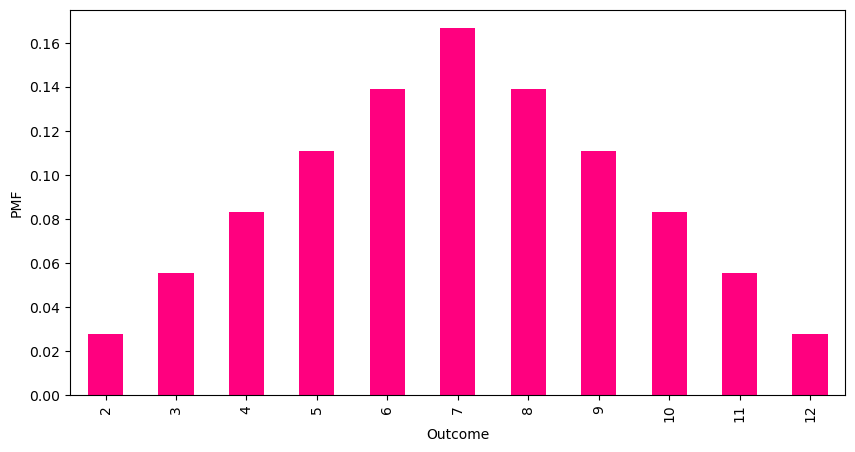

In [23]:
fig = plt.figure(figsize = (10, 5))
twice_df['PMF'].plot(kind='bar', color = '#FF007F')
plt.xlabel("Outcome")
plt.ylabel("PMF")
plt.show()

In [24]:
# If we have a sequence of Pmf objects that represent dice, we can compute the ditribution sum like this:

def add_dist_seq(seq):
    """ Compute Pmf of the sum of values from seq."""
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total

In [25]:
# As an example, we can make a list of three dice like this:

dice = [die]*3

# and we can compute the distribution of their sum like this:

thrice = add_dist_seq(dice)

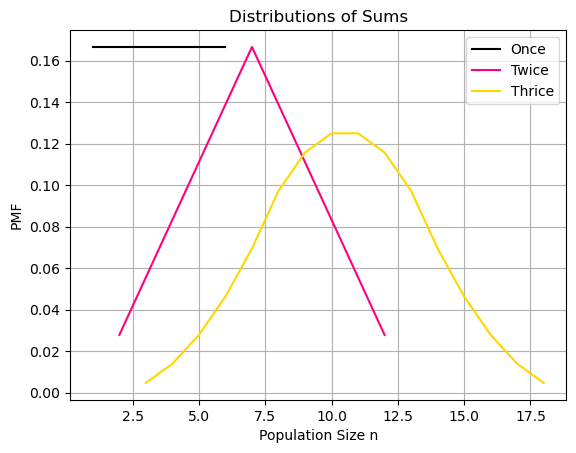

In [26]:
fig, ax = plt.subplots()
ax.plot(pmf_df, color = "black", label='Once')
ax.plot(twice_df, color = "#FF007F", label='Twice')
ax.plot(thrice, color = "gold", label='Thrice')

ax.set(xlabel='Population Size n', ylabel='PMF', title='Distributions of Sums')
ax.legend()
ax.grid()
plt.show()

In [27]:
# As an aside, this example demonstrates the Central Limit Theorem, which says that the distribution of a sum 
# Converges on a bell shaped normal distribution.

In [28]:
# Gluten Sensitivity

# In 2015, I read a paper that tested whether people diagnosed with gluten sensitivity (but not celiac) were able to distinguish between gluten 
# flour and non-gluten flour in a blind challenge.

# Out of 35 subjects, 12 correctly identified the gluten flour based on resumption of symptoms while they were eating it.  Another 17 wrongly 
# wrongly identified the gluten-free flour based on their symptoms, and 6 were unable to distinguish.

# The authors conclude, "Double-blind gluten challenge induces symptom recurrence in just one-third of patients."

# This conclusion seems odd to me, because if none of the patients were sensitive to gluten, we would expect some of them to identify the gluten
# flour by chance.  So here is the question: based on this data, how many of the subjects are sensitive to gluten and how many are guessing?

# We can use Bayes's Theorem to answer this question, but first we have to make some modeling decisions.  I'll assume:

# - People who are sensitive to gluten have a 95% chance of correctly identifying gluten-flour under the challenge conditions, and
# - People who are not sensitive have a 40% chance of identifying the gluten flour by chance (and a 60% chance of either choosing the other 
# flour or failing to distinguish).

# These particular values are arbitrary, but the results are not sensitive to these choices.

# I will solve the problem in two steps.  First, assuming that we know how many subjects are sensitive, I will compute the distribution of the data.
# Then using the likelihood of the data, I will compute the posterior distribution of the number of sensitive patients.

# The first is the forward problem; the second is the inverse problem.

In [29]:
# The Forward Problem

# Suppose we know that 10 of 35 subjects are sensitive to gluten. That means that 25 are not:

n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

# Each sensitive subject has a 95% chance of identifying the gluten flour, so the number of correct identifications follows a binomial distribution
# I'll use make binomial, which we defined in "The Binomial Distribution" on page 44, to make a Pmf that represents the binomial distribution.

from scipy.stats import binom

def make_binomial(n, p):
    """Make a binomial distribution.
    
    n: number of trials
    p: probability of success
    
    returns: Pmf representing the distribution of k
    """
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)


In [30]:
dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_insensitive = make_binomial(num_insensitive, 0.40)

In [31]:
# The results are the distributions for the number of correct identifications in each group.  Now we can use add_dist to compute the 
# distribution of the total number of correct identifications:

dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)

# Here are the results.

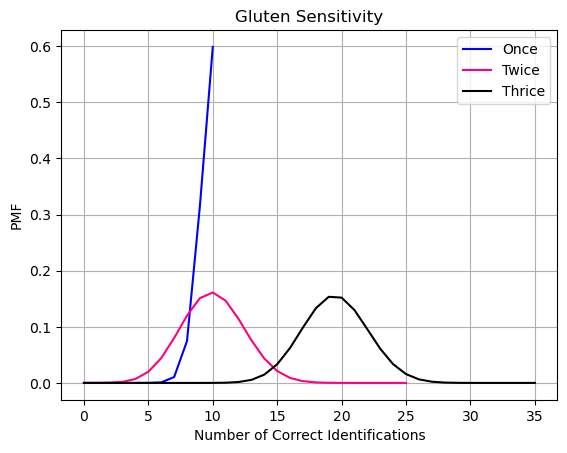

In [32]:
fig, ax = plt.subplots()
ax.plot(dist_sensitive, color = "blue", label='Once')
ax.plot(dist_insensitive, color = "#FF007F", label='Twice')
ax.plot(dist_total, color = "black", label='Thrice')

ax.set(xlabel='Number of Correct Identifications', ylabel='PMF', title='Gluten Sensitivity')
ax.legend()
ax.grid()
plt.show()

In [33]:
# We expect most of the sensitive subjects to identify the gluten flour correctly.  Of the 25 insensitive subjects, we expect about 10 to 
# identify the gluten flour by chance.  So we expect about 20 correct identifications in total.

# This is the answer to the forward problem.

In [34]:
# The Inverse Problem
# Now let's solve the Inverse Problem: given the data, we'll compute the posterior distribution of the number of sensitive subjects.

# Here's how.  I'll loop through the possible values of num_sensitive and compute the distribution of the data for each:

table = pd.DataFrame()
for num_sensitive in range (0, n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)
    table[num_sensitive] = dist_total

In [35]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       36 non-null     float64
 1   1       36 non-null     float64
 2   2       36 non-null     float64
 3   3       36 non-null     float64
 4   4       36 non-null     float64
 5   5       36 non-null     float64
 6   6       36 non-null     float64
 7   7       36 non-null     float64
 8   8       36 non-null     float64
 9   9       36 non-null     float64
 10  10      36 non-null     float64
 11  11      36 non-null     float64
 12  12      36 non-null     float64
 13  13      36 non-null     float64
 14  14      36 non-null     float64
 15  15      36 non-null     float64
 16  16      36 non-null     float64
 17  17      36 non-null     float64
 18  18      36 non-null     float64
 19  19      36 non-null     float64
 20  20      36 non-null     float64
 21  21      36 non-null     float64
 22  22  

In [36]:
# The loop enumerates the possible values of num_sensitive.  For each value, it computes the distribution of the total number of correct 
# identifications, and stores the result as a column in a pandas DataFrame.

# The following figure shows selected columns from the DataFrame, corresponding to different hypothetical values of num_sensitive:

In [37]:
print( table[10] )

0     2.776395e-19
1     5.737884e-17
2     5.426465e-15
3     3.109132e-13
4     1.204494e-11
5     3.335553e-10
6     6.810800e-09
7     1.043774e-07
8     1.212985e-06
9     1.076220e-05
10    7.341192e-05
11    3.889517e-04
12    1.623937e-03
13    5.431219e-03
14    1.478408e-02
15    3.322173e-02
16    6.237373e-02
17    9.881231e-02
18    1.331244e-01
19    1.534495e-01
20    1.520028e-01
21    1.297733e-01
22    9.563599e-02
23    6.084312e-02
24    3.337219e-02
25    1.573605e-02
26    6.349370e-03
27    2.177465e-03
28    6.287067e-04
29    1.508504e-04
30    2.953587e-05
31    4.598222e-06
32    5.475492e-07
33    4.684185e-08
34    2.563422e-09
35    6.741179e-11
Name: 10, dtype: float64


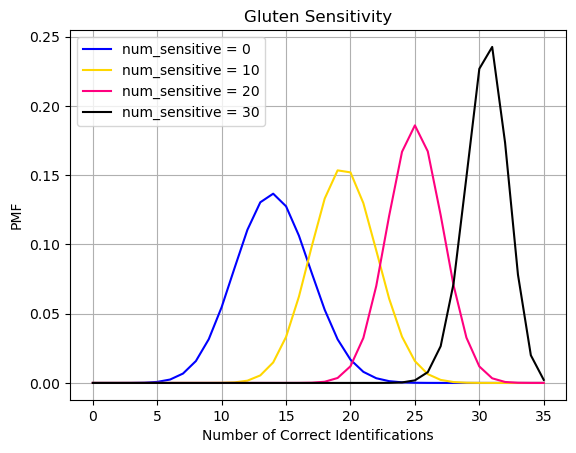

In [38]:
fig, ax = plt.subplots()

data0 = table[0]
data10 = table[10]
data20 = table[20]
data30 = table[30]

ax.plot(data0, color = "blue", label='num_sensitive = 0')
ax.plot(data10, color = "gold", label='num_sensitive = 10')
ax.plot(data20, color = "#FF007F", label='num_sensitive = 20')
ax.plot(data30, color = "black", label='num_sensitive = 30')

ax.set(xlabel='Number of Correct Identifications', ylabel='PMF', title='Gluten Sensitivity')
ax.legend()
ax.grid()
plt.show()

In [39]:
#Now we can use this table to compute the likelihood of the data:
    
likelihood1 = table.loc[12]

In [40]:
# loc selects a row from the DataFrame.  The row with index 12 contains the probability of 12 correct identifications for each hypothetical value of 
# num_sensitive:
    
hypos = np.arange(n+1)
prior = Pmf(1, hypos)

# And here's the update:

posterior1 = prior * likelihood1
posterior1.normalize()

0.4754741648615132

In [41]:
#For comparison, I also compute the posterior for another possible outcome, 20 correct identifications:
    
likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

1.7818649765887375

In [42]:
# The following figure shows posterior distributions of num_sensitive based on the actual data, 12 correct identifications, and the other
# possible outcome, 20 correct identifications.

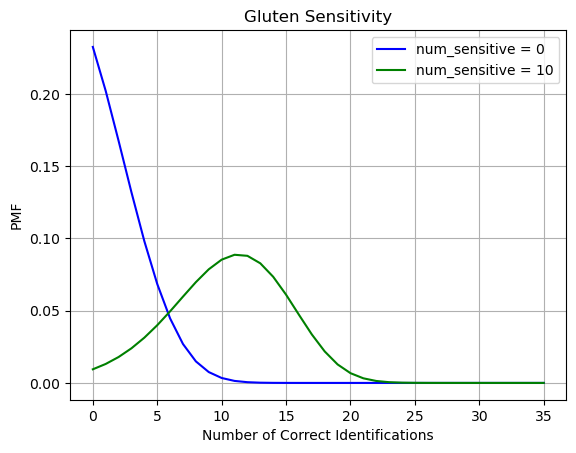

In [43]:
fig, ax = plt.subplots()

ax.plot(posterior1, color = "blue", label='num_sensitive = 0')
ax.plot(posterior2, color = "green", label='num_sensitive = 10')

ax.set(xlabel='Number of Correct Identifications', ylabel='PMF', title='Gluten Sensitivity')
ax.legend()
ax.grid()
plt.show()

In [44]:
# With 12 correct identifications, the most likely conclusion is that none of the subjects are sensitive to gluten.  If there had been 20 correct
# identifications, the most likely conclusion would be that 11-12 of the subjects were sensitive.

posterior1.max_prob()

0

In [45]:
posterior2.max_prob()

11

In [46]:
# Strangely, there is no Exercise 6-1 in the book.

In [47]:
# Exercise 6-2
# Let's use Bayes' rule to solve the Elvis problem from Chapter 3:

# Elvis had a twin brother who died at birth.  What is the probability that Elvis was an identical twin?

# In 1935, about 2/3 of twins were fraternal and 1/3 were identical.  The question contains two pieces of information we can use to update the prior.

# First, Elvis's twin was also male, which is more likely if they were identical twins, with a likelihood ratio of 2.
# Also, Elvis's twin died at birth, which is more likely if they were identical twins with a likelihood ratio of 1.25

# If you are curious about those numbers, check out the blog post by the author (https://oreil.ly/SPbMo) or 
# (https://www.allendowney.com/blog/2020/01/28/the-elvis-problem-revisited/)

In [48]:
# Data pulled from the book where problem is found
# from book, approx 1/125 of all births are fraternal twins 1/300 births are identical twins.  
# approximate the probability of a boy or girl birth as 1/2.

In [49]:
# odds(A|D) = P(D|A) / P(D|B)
# The term on the left is the ratio of posterior and prior odds.  The term on the right is the likelihood ratio, also called
# the Bayes factor.

In [50]:
# In the cookie problem, the prior probability of coming from Bowl 1 is 50%
# Probability of vanilla (D) given 2 bowls (B) is 1/2
# In the Elvis problem, the prior probability of identical twin (D) given identical or fraternal (B) is (1/3), yielding odds of 
odds(1/3)

0.49999999999999994

In [106]:
# We are given likelihood ratio of 2 and likelihood ratio of 1.25
prior_odds = 0.499999
likelihood_ratio = 2 * 1.25 # Still trying to figure out how he got these, I get 1.19 instead of 1.25% which yields a final answer of 54%
post_odds = prior_odds * likelihood_ratio
post_odds

1.2499975

In [105]:
post_prob = prob(post_odds)
post_prob

0.5555550617278464

In [53]:
# So using Bayes' Rule, 
# the probability that Elvis was an identical twin, given that his twin brother died at birth is 55%

In [54]:
# *********************************************************************************************
# Further exploration to understand where the likelihood factors, 2 and 1.25 came from

In [55]:
# odds(A|D) = P(D|A) / P(D|B)
# In the cookie problem, the likelihood ratio was (3/4) / (1/2) or (3/2)
# because Bowl contained 30 vanilla and 10 chocolate, So probability of vanilla(D) given Bowl 1(A) is 3/4
# and Bowl 2 contained 20 of each so probability of vanilla (D) given Bowl 2 (B) is (1/2)

# In the Elvis problem, this isn't so simple
# the likelihood ratio for probability of male who is also and idenical twin would be 
# (male (D) given identical (A)) / (male (D) given fraternal(B))

# We have been provided the information that 2/3 are fraternal and 1/3 are identical
index = ['identical', 'fraternal']
prior = 1-(2/3), (2/3)
likelihood = 1, 0.5 # If identical twins, there is a 100% chance of male, but if fraternal 50% chance of male

In [62]:
# Creating a Bayes table

def make_bayes_table(index, prior, likelihood):
    table = pd.DataFrame(index=index)
    table['prior'] = prior
    table['likelihood'] = likelihood
    table['unnorm'] = table['prior'] * table['likelihood']
    prob_data = table['unnorm'].sum()
    table['posterior'] = table['unnorm'] / prob_data
    return table

In [63]:
table = make_bayes_table(index, prior, likelihood)
table

,prior,likelihood,unnorm,posterior
identical,0.333333,1.0,0.333333,0.5
fraternal,0.666667,0.5,0.333333,0.5


In [96]:
# Thus the probability that same sex twins are identical is 
p_i = table['posterior']['identical']
P_fr = table['posterior']['fraternal']
p_i

0.5

In [97]:
# The likelihood ratio would be 
li_r = (table['likelihood']['identical']) / (table['likelihood']['fraternal'])
li_r
# this is likelihood ratio provided in the question

2.0

In [73]:
# Also in the Elvis problem, the probability of stillborn (D) given identical (A) is

# from data: 
# One stillborn from each set of male twins - 655 (some identical)
# One stillborn from each set of female twins - 564 (some identical)
# One male twin stillborn from M/F set of twins - 258 (not identical)
# One female twin stillborn from F/M set of twins is 299 (not identical)

# We cannot calculate the probability of stillborn given identical because we don't know how many of the same-sex twins are fraternal. We do know
# that all of the mixed-sex sets are fraternal, and can compute the probability of stillborn given fraternal based on this subset of data.

opp_still = 258 + 299
opp_sum = 8397
p_f = opp_still / opp_sum
print(p_f)

0.06633321424318209


In [74]:
# We can do the same with same-sex twins, probability of one stillborn given same-sex
same_still = 655 + 564
same_sum = 8678 + 8122
p_ss = same_still / same_sum
print(p_ss)

0.07255952380952381


In [75]:
# the prob of one stillborn given same sex can be written as:
# p_still_samesex = (prob_identical)(prob_still_identical) + (1 - prob_identical)/(prob_still_fraternal)
# p_ss = (p_i)(prob_still_identical) + (1-p_i)/(p_f)

In [82]:
# to solve for probability of one stillborn in identical twins, this can be rewritten as 
prob_still_identical= (p_ss - (1 - p_i)*(p_f))/p_i
prob_still_identical

0.07878583337586553

In [101]:
#********************************************************************************************************************
# likelihood ratio is P(D|A) / P(D|B)
# So the likelihood ratio would be probability of one stillborn given identical / probability of one stillborn given fraternal  
l_f = prob_still_identical / p_f
l_f

# This is not the same as the likelihood ratio of 1.25 given by the book **********************************

1.187728263657348

In [84]:
# So the probability of one stillborn in identical twins is 7.8%
# combining this information with the prior information

prior2 = table['posterior']
likelihood2 = p_f , prob_still_identical
table2 = make_bayes_table(index, prior2, likelihood2)
table2

,prior,likelihood,unnorm,posterior
identical,0.5,0.066333,0.033167,0.457095
fraternal,0.5,0.078786,0.039393,0.542905


In [ ]:
# This also shows the probability that Elvis was a twin to be about 54%

In [68]:
#Exercise 6-3
# The following is an interview question that appeared on glassdoor.com (https://oreil.ly/M1c1I), attributed to Facebook:

# You're about to

In [67]:
# They are not seeing if I am ready for real life, they don't even let me call my family.  This isn't therapy for me.  It is 
# punishment for me.
